# Machine Maintenance 

## 1. Dependences

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

## 2.Data exploration

In [2]:
data=pd.read_csv("predictive_maintenance.csv")
data

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

## 3.Null values & Data types

In [3]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [4]:
data.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

## 4.Statistical information

In [5]:
data.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

## 5.count of target

In [25]:
failure=data[data["Target"]==1]
print("Total number of not failure machines=",(failure["Target"].value_counts()[1]))
not_failure=data[data["Target"]==0]
print("Total number of failure machines=",(not_failure["Target"].value_counts()[0]))


Total number of not failure machines= 339
Total number of failure machines= 9661


## 6.Data visualization

<AxesSubplot:xlabel='Target', ylabel='count'>

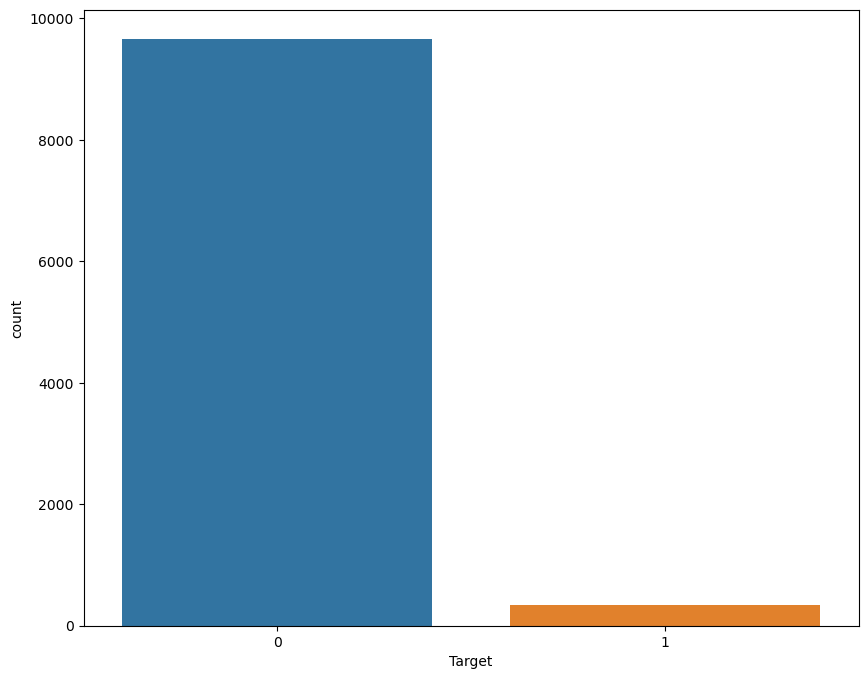

In [6]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x="Target")

<AxesSubplot:xlabel='Failure Type', ylabel='count'>

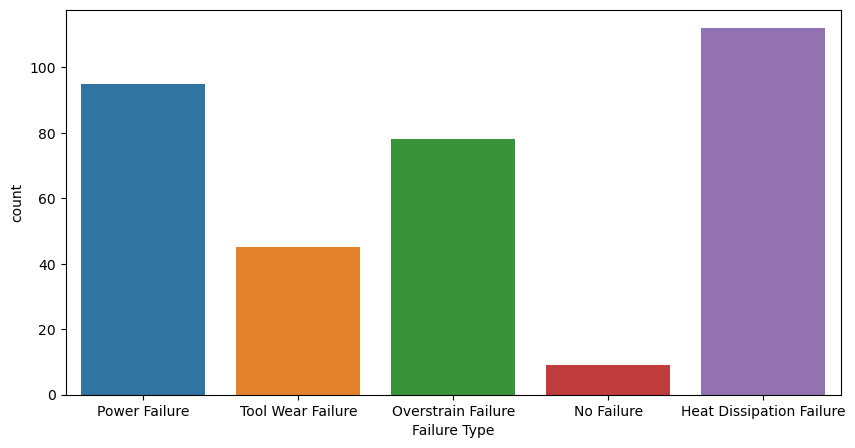

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=data[data['Target']==1],x="Failure Type")


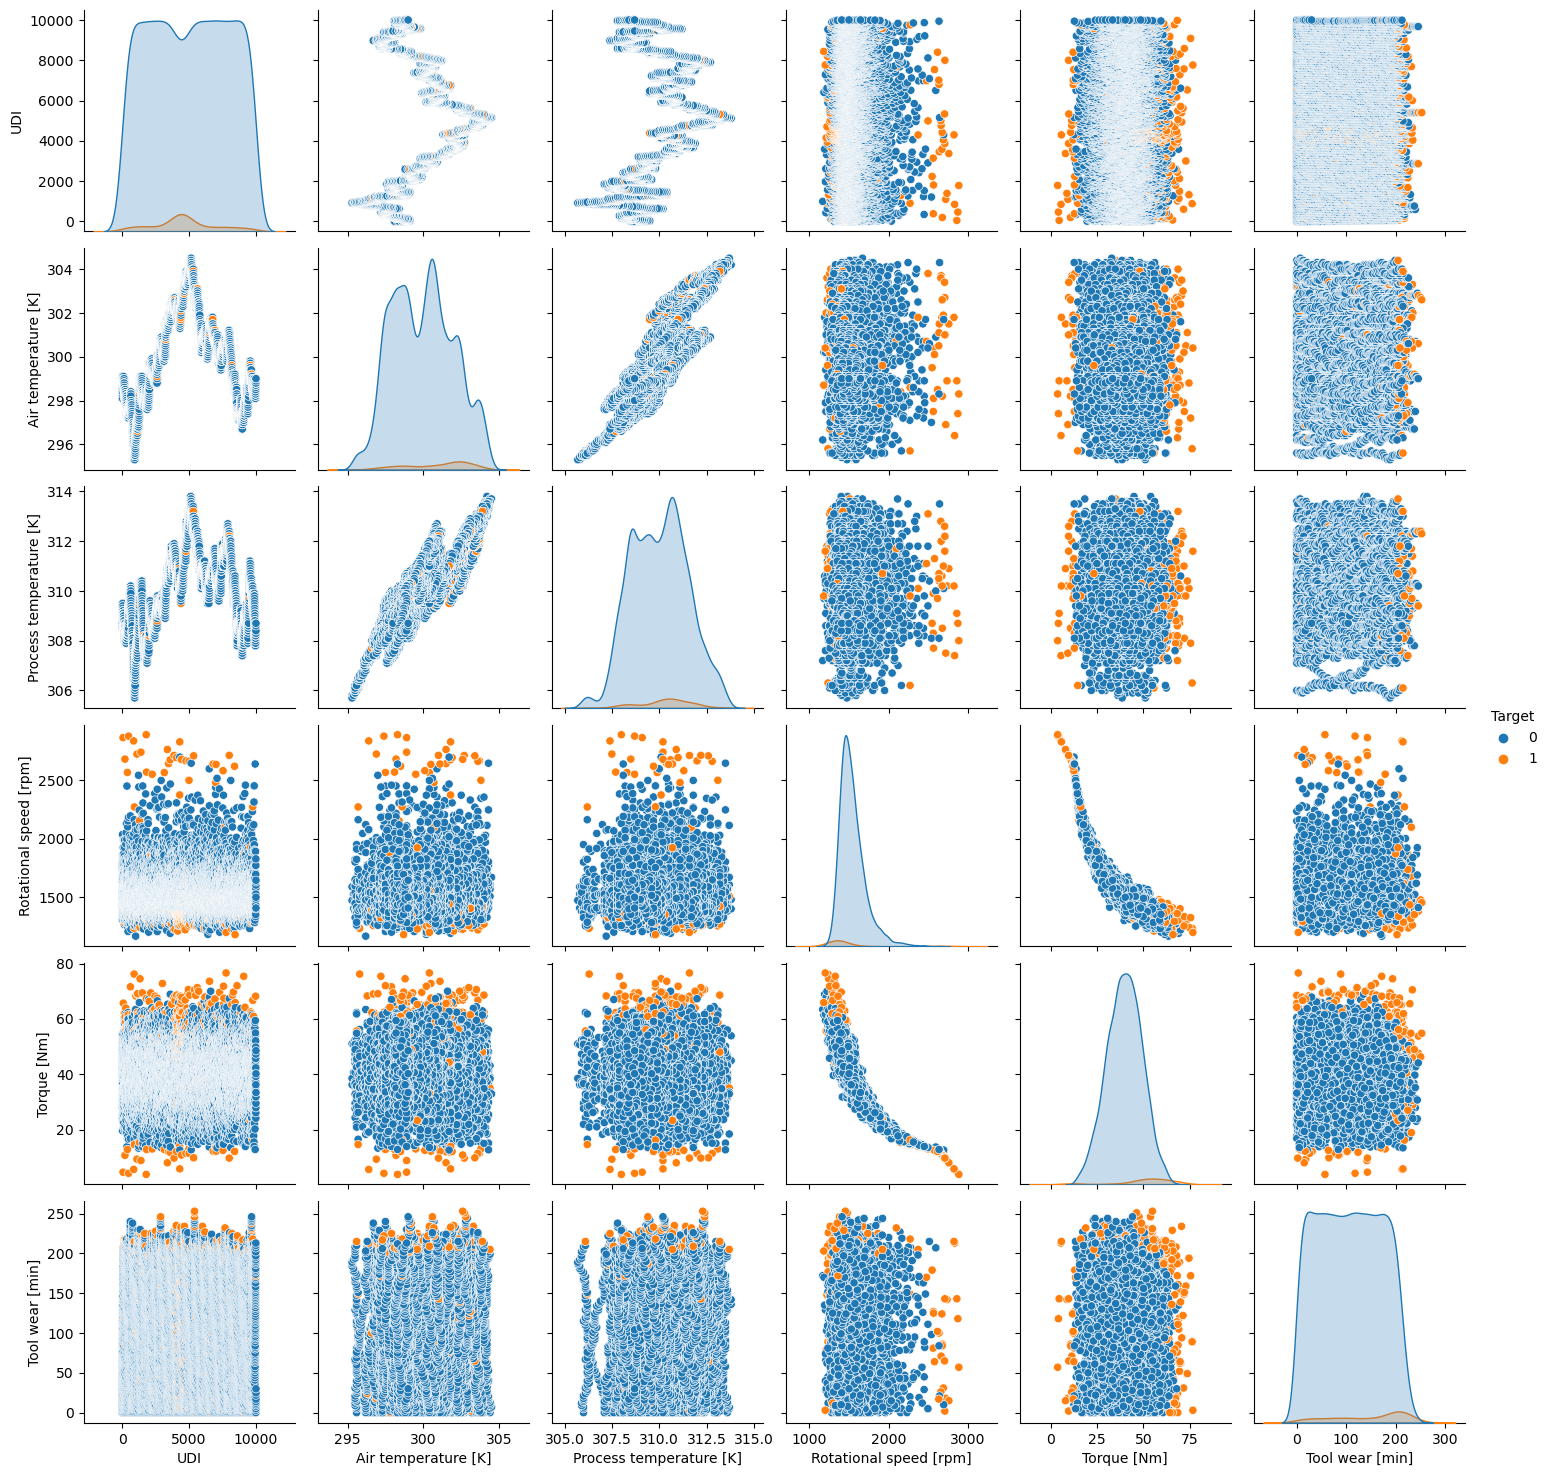

In [13]:
sns.pairplot(data,hue='Target')


In [17]:
import plotly.express as px

fig = px.scatter_3d(data, x='Tool wear [min]', y='Torque [Nm]', z='Rotational speed [rpm]',
              color='Target')
fig.show()

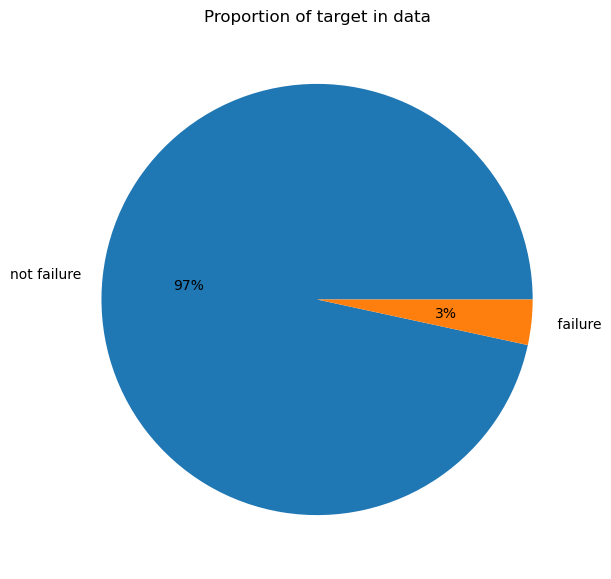

In [30]:
plt.figure(figsize=(7,7))
plt.pie(data["Target"].value_counts().values,labels=["not failure"," failure"],autopct="%1.0f%%")
plt.title("Proportion of target in data")
plt.show()

<AxesSubplot:>

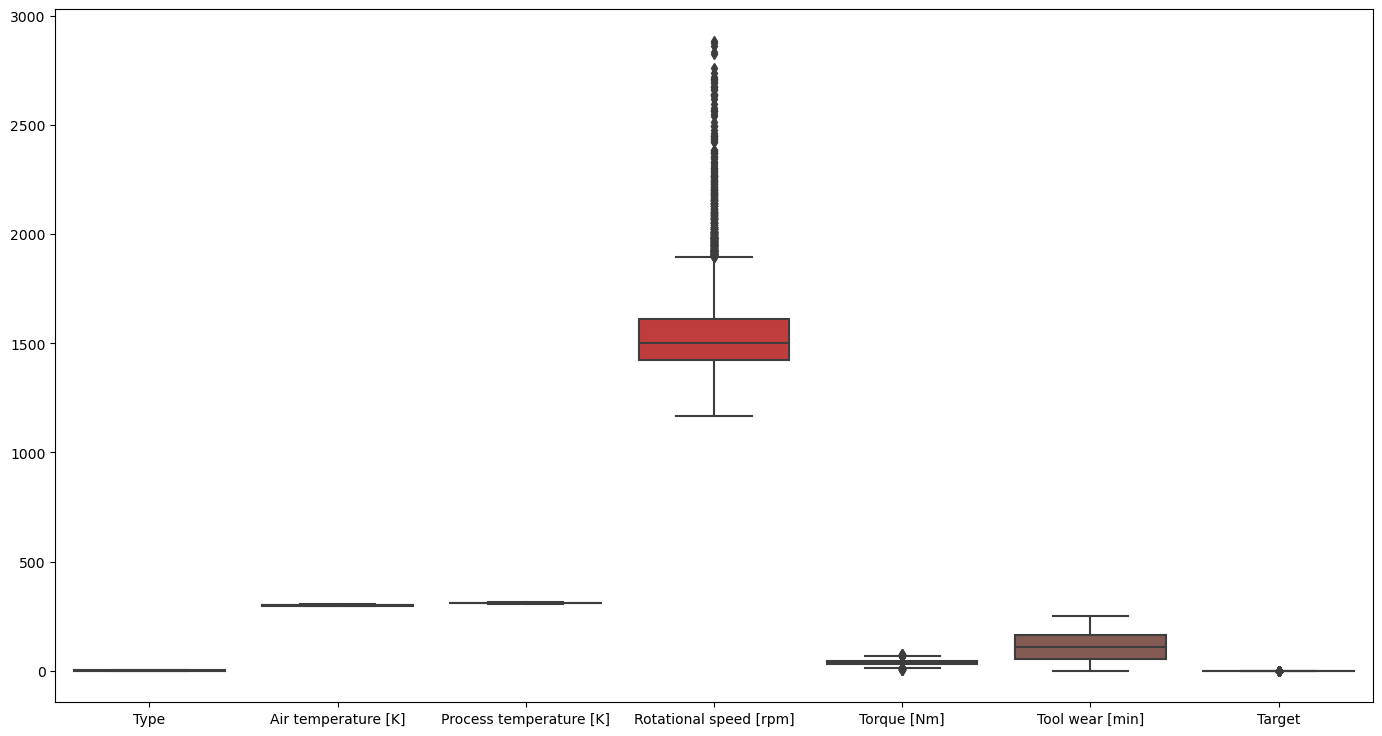

In [32]:
plt.figure(figsize=(17,9))
sns.boxplot(data = data1)

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Density'>

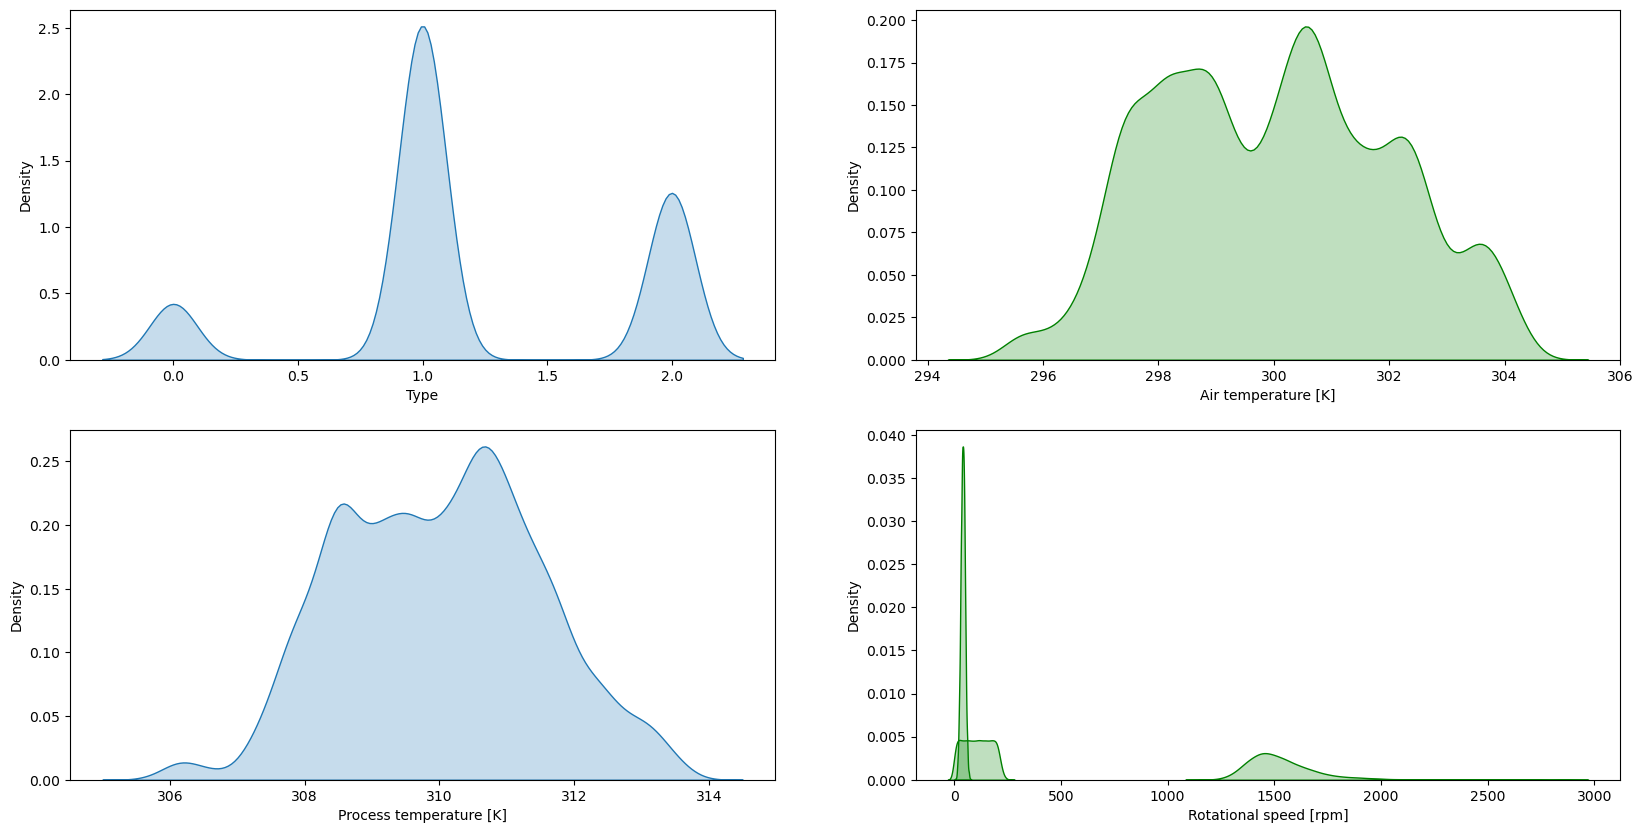

In [33]:
fig, axs  = plt.subplots(2, 2, figsize=(20, 10))

sns.kdeplot(data1['Type'], shade=True, ax=axs[0][0])
sns.kdeplot(data1['Air temperature [K]'], shade=True, color='green', ax=axs[0][1])
sns.kdeplot(data1['Process temperature [K]'], shade=True, ax=axs[1][0])
sns.kdeplot(data1['Rotational speed [rpm]'], shade=True, color='green', ax=axs[1][1])
sns.kdeplot(data1['Torque [Nm]'], shade=True, color='green', ax=axs[1][1])
sns.kdeplot(data1['Tool wear [min]'], shade=True, color='green', ax=axs[1][1])

## 7.Data preprocessing

In [14]:
data1=data.drop(columns=["UDI","Product ID","Failure Type"])
data1

Type  Air temperature [K]  Process temperature [K]  \
0       M                298.1                    308.6   
1       L                298.2                    308.7   
2       L                298.1                    308.5   
3       L                298.2                    308.6   
4       L                298.2                    308.7   
...   ...                  ...                      ...   
9995    M                298.8                    308.4   
9996    H                298.9                    308.4   
9997    M                299.0                    308.6   
9998    H                299.0                    308.7   
9999    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  
0                       1551         42.8                0       0  
1                       1408         46.3                3       0  
2                       1498         49.4                5       0  
3                       1433         39.5                7       0  
4                       1408         40.0                9       0  
...                      ...          ...              ...     ...  
9995                    1604         29.5               14       0  
9996                    1632         31.8               17       0  
9997                    1645         33.4               22       0  
9998                    1408         48.5               25       0  
9999                    1500         40.2               30       0  

[10000 rows x 7 columns]

In [15]:
data1["Type"].unique()

array(['M', 'L', 'H'], dtype=object)

In [16]:
lb=LabelEncoder()
data1["Type"]=lb.fit_transform(data1["Type"])


In [14]:
x=data1.drop("Target",axis=1)
y=data1["Target"]

## 8.Cross validation

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [16]:
log_score=cross_val_score(LogisticRegression(),X=x,y=y,cv=5)
svm_score=cross_val_score(SVC(),X=x,y=y)  
rf_score=cross_val_score(RandomForestClassifier(random_state=15),X=x,y=y)
knc_score=cross_val_score(KNeighborsClassifier(n_neighbors=10),X=x,y=y)
adboost_score=cross_val_score(AdaBoostClassifier(),X=x,y=y)

In [17]:
print(log_score)
print(svm_score)
print(rf_score)
print(knc_score)
print(adboost_score)

[0.969  0.9635 0.9655 0.973  0.968 ]
[0.9665 0.966  0.966  0.966  0.966 ]
[0.9735 0.975  0.558  0.9715 0.982 ]
[0.972  0.97   0.9665 0.9685 0.9705]
[0.976  0.973  0.5145 0.9645 0.975 ]


In [18]:
print(np.mean(log_score))
print(np.mean(svm_score))
print(np.mean(rf_score))
print(np.mean(knc_score))
print(np.mean(adboost_score))

0.9678000000000001
0.9661000000000002
0.892
0.9695
0.8805999999999999


## 9.Hyperparameter tuning

In [19]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [20]:
kn=KNeighborsClassifier()

In [21]:
gscv=GridSearchCV(kn,{"n_neighbors":[5,10,15,20,25,30]})
gscv.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30]})

In [22]:
gs_data=gscv.cv_results_
pd.DataFrame(gs_data)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.028124      0.006248         0.109364        0.009881   
1       0.028908      0.006808         0.104958        0.006165   
2       0.024999      0.007649         0.128113        0.015308   
3       0.028125      0.006249         0.112490        0.006249   
4       0.028125      0.006249         0.118742        0.007648   
5       0.028125      0.006248         0.115615        0.007645   

  param_n_neighbors               params  split0_test_score  \
0                 5   {'n_neighbors': 5}             0.9720   
1                10  {'n_neighbors': 10}             0.9720   
2                15  {'n_neighbors': 15}             0.9735   
3                20  {'n_neighbors': 20}             0.9725   
4                25  {'n_neighbors': 25}             0.9730   
5                30  {'n_neighbors': 30}             0.9715   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0             0.9700             0.9640             0.9680             0.9725   
1             0.9700             0.9665             0.9685             0.9705   
2             0.9705             0.9660             0.9685             0.9715   
3             0.9695             0.9675             0.9690             0.9700   
4             0.9700             0.9675             0.9690             0.9705   
5             0.9690             0.9675             0.9680             0.9700   

   mean_test_score  std_test_score  rank_test_score  
0           0.9693        0.003092                5  
1           0.9695        0.001871                4  
2           0.9700        0.002569                1  
3           0.9697        0.001631                3  
4           0.9700        0.001817                2  
5           0.9692        0.001435                6

In [23]:
gscv.best_score_

0.9700000000000001

In [24]:
gscv.best_params_

{'n_neighbors': 15}

## 10.KNeighbors

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=43)

In [26]:
scale=MinMaxScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.transform(x_test)

In [27]:
model=KNeighborsClassifier(n_neighbors=15)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [28]:
model.score(x_test,y_test)

0.968

In [29]:
y_prd=model.predict(x_test)
pd.DataFrame({"actual y value":y_test,"predicted y value":y_prd})

actual y value  predicted y value
9415               0                  0
6377               0                  0
8019               0                  0
7754               0                  0
4961               0                  0
...              ...                ...
4018               0                  0
3969               0                  0
8957               0                  0
7658               0                  0
4901               0                  0

[2500 rows x 2 columns]

In [30]:
cm=confusion_matrix(y_test,y_prd)
cm

array([[2411,    3],
       [  77,    9]], dtype=int64)

In [31]:
accuracy_score(y_test,y_prd)

0.968

Text(50.722222222222214, 0.5, 'predicted')

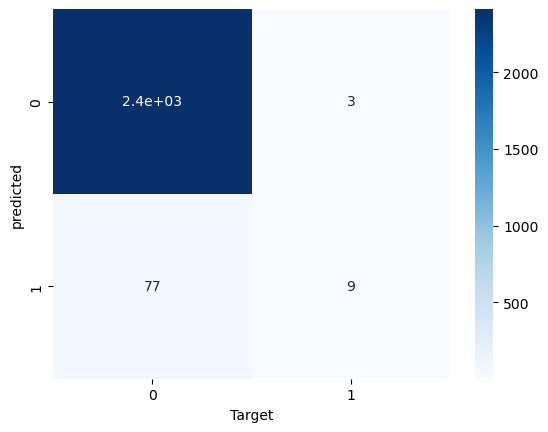

In [32]:
sns.heatmap(cm,annot=True,cmap="Blues")
plt.xlabel("Target")
plt.ylabel("predicted")

In [33]:
print(classification_report(y_test,y_prd))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2414
           1       0.75      0.10      0.18        86

    accuracy                           0.97      2500
   macro avg       0.86      0.55      0.58      2500
weighted avg       0.96      0.97      0.96      2500



In [34]:
score_dic={"n_neighbors":[],"score":[]}
for i in range(3,30):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    score=knn.score(x_test,y_test)
    score_dic["n_neighbors"].append(i)
    score_dic["score"].append(score)

    
score_df=pd.DataFrame(score_dic)
score_df.head(20)

n_neighbors   score
0             3  0.9712
1             4  0.9700
2             5  0.9712
3             6  0.9696
4             7  0.9692
5             8  0.9696
6             9  0.9692
7            10  0.9684
8            11  0.9692
9            12  0.9688
10           13  0.9696
11           14  0.9684
12           15  0.9680
13           16  0.9676
14           17  0.9676
15           18  0.9680
16           19  0.9680
17           20  0.9668
18           21  0.9672
19           22  0.9672

## 11.prediction

In [35]:
model.predict(scale.transform([[2,299.0,308.6,1645,33.4,22]]))


array([0], dtype=int64)

In [42]:
Type=float(input("Enter Type:"))
Air_temperature=float(input("Enter Air temperature value:"))
Process_temperature=float(input("Enter Process temperature value:"))
Rotational_speed=float(input("Enter Rotational speed value:"))
Torque=float(input("Enter Torque value:"))
Tool_wear=float(input("Enter Tool wear value:"))



Enter Type:1
Enter Air temperature value:298.9
Enter Process temperature value:309.1
Enter Rotational speed value:2861
Enter Torque value:4.6
Enter Tool wear value:143


In [43]:
result=model.predict(scale.transform([[Type,Air_temperature,Process_temperature,Rotational_speed,Torque,Tool_wear]]))
result

array([1], dtype=int64)